In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.python import debug as tf_debug

try: 
    import warnings
    warnings.filterwarnings('ignore')
except:
    pass

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
if tf.test.is_gpu_available():
    print('GPU is available and detected by TensorFlow')
    print(tf.config.list_physical_devices('GPU'))
else:
    print('GPU is NOT available or NOT detected by TensorFlow')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available and detected by TensorFlow
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# import os
# os.chdir('/content/drive/My Drive/Colab Notebooks/oracle reto 1')

In [6]:
train = pd.read_csv("train.csv")
train.head()

,idx_train,path_img,label
0,0,all_imgs/bc7696f4-1460-4d0b-a63d-f84b3be4da0f....,0
1,1,all_imgs/f8d50663-60d8-4da5-a8b8-79f954aec503....,2
2,2,all_imgs/51df0f29-758b-4741-ab74-a0ff8e21c044....,4
3,3,all_imgs/f61b81d3-3b79-4162-b4d6-4f1b39518c4c....,0
4,4,all_imgs/b21e0668-bd09-4794-9e90-da8ecffc4c1c....,0


In [7]:
test = pd.read_csv("test.csv")
test.head()

,idx_test,path_img
0,0,all_imgs/ec4c75ba-e064-4ed0-a7b1-3ed899424110....
1,1,all_imgs/114fb94d-3223-4d95-b6d1-f6a6ac206ea2....
2,2,all_imgs/a80e7e27-a25a-40aa-a65c-a29bfa172b3d....
3,3,all_imgs/7848d24e-207a-4236-9cd7-df78122d8787....
4,4,all_imgs/57f726bc-d141-42fb-88fa-60d554499277....


In [8]:
test.columns

Index(['idx_test', 'path_img'], dtype='object')

In [9]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11189 entries, 0 to 11188
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   idx_train  11189 non-null  int64 
 1   path_img   11189 non-null  object
 2   label      11189 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 262.4+ KB


In [10]:
train.describe()

,idx_train,label
count,11189.000000,11189.000000
mean,5594.000000,3.499866
std,3230.130415,2.296047
min,0.000000,0.000000
25%,2797.000000,1.000000
50%,5594.000000,3.000000
75%,8391.000000,6.000000
max,11188.000000,7.000000


In [11]:
train.isna().sum()

idx_train    0
path_img     0
label        0
dtype: int64

In [12]:
test.isna().sum()

idx_test    0
path_img    0
dtype: int64

In [13]:
train["path_img"][0]

'all_imgs/bc7696f4-1460-4d0b-a63d-f84b3be4da0f.jpeg'

In [14]:
base_dir = "./"

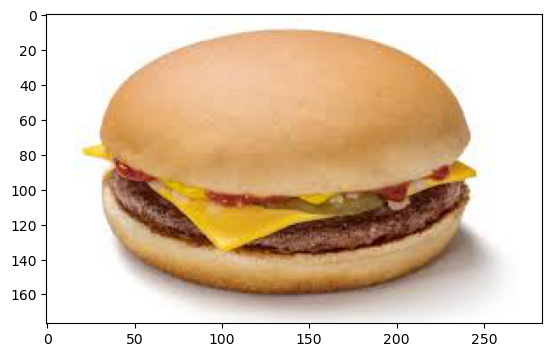

In [15]:
plt.imshow(load_img(os.path.join(base_dir, train["path_img"][0])))
plt.grid(False)
plt.show()

In [16]:
train["label"].value_counts()

1    1431
6    1407
7    1404
5    1402
0    1396
3    1395
4    1378
2    1376
Name: label, dtype: int64

In [17]:
# test["label"].value_counts()

In [18]:
# Define the number of classes
num_classes = train["label"].nunique()

# Define the target_size
target_size = (224, 224)

# Define the batch size
batch_size = 64

# Define the input shape
input_shape = (224, 224, 3)

In [19]:
num_classes

8

In [20]:
train['label'] = train['label'].apply(lambda x: str(x)) 
# test['label'] = test['label'].apply(lambda x: str(x)) 

In [21]:
img = cv2.imread(train["path_img"][6])

# Print the shape of the image
print(img.shape)

(183, 275, 3)


Create validation dataset (option 1)

In [22]:
# # Split the dataset into training and validation sets
# train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)
# total_train = train_df.shape[0]
# total_validate = val_df.shape[0]
# total_test = test.shape[0]

In [23]:
# train_steps = int(total_train / batch_size)
# validation_steps = int(total_validate / batch_size)
# test_steps = int(total_test / batch_size)

In [24]:
# # Create ImageDataGenerator objects for training and validation sets
# train_datagen = ImageDataGenerator(rescale=1.0/255.,
#                                      rotation_range=0.1,
#                                      width_shift_range=0.1,
#                                      height_shift_range=0.1,
#                                      shear_range=0.1,
#                                      zoom_range=0.1,
#                                      horizontal_flip=False,
#                                      fill_mode="nearest")
# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=train_df,
#     color_mode="rgb",
#     x_col='path_img', # Column containing the image file paths
#     y_col='label', # Column containing the image labels
#     target_size=target_size, # Size of input images
#     batch_size=batch_size,
#     class_mode='sparse', # Use categorical cross-entropy loss
#     shuffle=False # Shuffle the order of images
# )

# val_generator = val_datagen.flow_from_dataframe(
#     dataframe=val_df,
#     color_mode="rgb",
#     x_col='path_img',
#     y_col='label',
#     target_size=target_size,
#     batch_size=batch_size,
#     class_mode='sparse',
#     shuffle=False # Don't shuffle the order of images
# )

# test_generator = test_datagen.flow_from_dataframe(
#     dataframe=test,
#     color_mode="rgb",
#     x_col='path_img',
#     y_col='label',
#     target_size=target_size,
#     batch_size=batch_size,
#     class_mode='sparse',
#     shuffle=False # Don't shuffle the order of images
# )

Full dataset (option 2)

In [26]:
total_train = train.shape[0]
total_validate = test.shape[0]

In [27]:
train_steps = int(total_train / batch_size)
validation_steps = int(total_validate / batch_size)

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    color_mode="rgb",
    x_col='path_img', # Column containing the image file paths
    y_col='label', # Column containing the image labels
    target_size=target_size, # Size of input images
    batch_size=32,
    class_mode='sparse', # Use categorical cross-entropy loss
    shuffle=True, # Shuffle the order of images
    )

val_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    color_mode="rgb",
    x_col='path_img',
    y_col='label',
    target_size=target_size,
    batch_size=32,
    class_mode=None,
    shuffle=False, # Don't shuffle the order of images
)

Found 11189 validated image filenames belonging to 8 classes.
Found 4797 validated image filenames.


Model

In [30]:
# def f1_score(y_true, y_pred):
#     y_pred = tf.round(tf.keras.backend.clip(y_pred, 0, 1))
#     tp = tf.reduce_sum(tf.cast(y_true*y_pred, tf.float32), axis=0)
#     fp = tf.reduce_sum(tf.cast((1-y_true)*y_pred, tf.float32), axis=0)
#     fn = tf.reduce_sum(tf.cast(y_true*(1-y_pred), tf.float32), axis=0)
#     precision = tp / (tp + fp + tf.keras.backend.epsilon())
#     recall = tp / (tp + fn + tf.keras.backend.epsilon())
#     f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
#     f1_macro = tf.reduce_mean(f1)

#     return f1_macro

In [31]:
# # Callbacks for f1-score
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('loss') < 0.4 and logs.get('f1_score') > 0.99):
#             print('\nLoss is low and F1-score is high, so cancelling training!')
#             self.model.stop_training = True

# early_stop = EarlyStopping(monitor='f1_score', mode='max', patience=5, verbose=1)
# lr_reduce = ReduceLROnPlateau(monitor='f1_score', mode='max', factor=0.1, patience=2, verbose=1, min_lr=0.00001)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='f1_score', mode='max', save_best_only=True, verbose=1)
# tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [32]:
# # Callbacks for sparse categorical accuracy
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('loss') < 0.4 and logs.get('sparse_categorical_accuracy') > 0.99):
#             print('\nLoss is low and sparse accuracy is high, so cancelling training!')
#             self.model.stop_training = True

# early_stop = EarlyStopping(monitor='sparse_categorical_accuracy', mode='max', patience=5, verbose=1)
# lr_reduce = ReduceLROnPlateau(monitor='sparse_categorical_accuracy', mode='max', factor=0.1, patience=2, verbose=1, min_lr=0.00001)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='sparse_categorical_accuracy', mode='max', save_best_only=True, verbose=1)
# tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [33]:
# Callbacks for accuracy
class AccCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.4 and logs.get('accuracy') > 0.99):
            print('\nLoss is low and accuracy is high, so cancelling training!')
            self.model.stop_training = True

early_stop = EarlyStopping(monitor='accuracy', mode='max', patience=5, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='accuracy', mode='max', factor=0.1, patience=2, verbose=1, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', save_best_only=True, verbose=1)
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [34]:
model = Sequential([
    
# First block
                 Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape = input_shape),
                 BatchNormalization(),
                 Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'),
                 BatchNormalization(),
                 MaxPool2D(strides=(2,2)),
                 Dropout(0.25),

# Second block
                 Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
                 BatchNormalization(),
                 Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
                 BatchNormalization(),
                 MaxPool2D(strides=(2,2)),
                 Dropout(0.25),

# Third block 
                 Flatten(),
                 Dense(512, activation='relu'),
                 Dropout(0.25),

# Fourth block
                 Dense(1024, activation='relu'),
                 Dropout(0.4),
                 Dense(num_classes, activation='softmax')
])

In [35]:
# # Model talent squuad
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=input_shape),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
#     tf.keras.layers.MaxPooling2D(2,2), 
#     tf.keras.layers.Flatten(), 
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation="relu"), 
#     tf.keras.layers.Dense(num_classes, activation="softmax")  
# ])

In [36]:
# # Model zero deforestation mission
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation="softmax")) 

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      2320      
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                        

In [38]:
# epochs = 90
# batch_size = 10
# train_steps = int(train_length_2 / batch_size)
# validation_steps = int(val_length / batch_size)

In [39]:
%%time
# Compile the model with the custom F1-score metric
# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=[f1_score])

# Compile the model with the custom sparse_categorical_crossentropy metric
# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

# Compile the model with the accuracy metric
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define the callbacks
callbacks = [myCallback()]

# Train the model and save the training history
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    steps_per_epoch=train_steps,
                    callbacks=callbacks)

Epoch 1/20


: 

: 

In [ ]:
model.summary()

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

preds = probability_model.predict(test_generator)

In [ ]:
preds

In [ ]:
predicted_classes = preds.argmax(axis=1)
predicted_classes

Model Evaluation

In [ ]:
def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) 
    pred_list=[ ] 
    true_list=[]
    for i, p in enumerate(preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = metrics.classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = metrics.confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt="g", cmap="Blues", cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
# Obtener las métricas de entrenamiento y validación
loss = history.history["loss"]
val_loss = history.history["val_loss"]
f1 = history.history["f1_score"]
val_f1 = history.history["val_f1_score"]

# Graficar la F1-score y la val_f1-score del modelo
plt.plot(f1)
plt.plot(val_f1)
plt.title("Model's F1-score")
plt.ylabel("F1-score")
plt.xlabel("Epoch")
plt.legend(["F1-score", "Val_F1-score"], loc="upper left")
plt.show()

# Graficar la pérdida del modelo
plt.plot(loss)
plt.plot(val_loss)
plt.title("Model's Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "Val_loss"], loc="upper left")
plt.show()

In [ ]:
# Obtener las métricas de entrenamiento, validación y prueba
loss = history.history["loss"]
val_loss = history.history["val_loss"]
f1 = history.history["f1_score"]
val_f1 = history.history["val_f1_score"]
test_loss, test_f1 = model.evaluate(test_generator)

# Graficar la F1-score y la val_f1-score del modelo
plt.plot(f1)
plt.plot(val_f1)
plt.plot(test_f1)
plt.title("Model's F1-score")
plt.ylabel("F1-score")
plt.xlabel("Epoch")
plt.legend(["F1-score", "Val_F1-score", "Test_F1-score"], loc="upper left")
plt.show()

# Graficar la pérdida del modelo
plt.plot(loss)
plt.plot(val_loss)
plt.plot(test_loss)
plt.title("Model's Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "Val_loss", "Test_loss"], loc="upper left")
plt.show()

In [ ]:
# Generate predictions for test set
test_pred_prob = model.predict(test_generator)

# Convert probabilities to class labels
test_pred_labels = np.argmax(test_pred_prob, axis=1)

# Get true labels from test generator
test_true_labels = test_generator.classes

# Compute test F1-score
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')

# Print test F1-score
print('Test F1-score:', test_f1_score)

In [ ]:
cm_cr(val_generator, model)

In [ ]:
cm_cr(test_generator, model)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
preds_labels = [labels[k] for k in predicted_classes]

In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":preds_labels,
                      "Value":predicted_classes_2})
results.to_csv("results.csv",index=False)
files.download("results.csv")

In [ ]:
results_json = pd.read_csv("results.csv")

In [ ]:
results_json.to_json("predictions.json")

In [ ]:
files.download("predictions.json")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization


class MyModel:
    def __init__(self, input_shape, num_classes):
        self.model = Sequential([
        # First block
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Second block
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Third block 
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Fourth block
        Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
])

    def get_model(self):
        return self.model
    
    def compile_model(self, optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']):
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def predict(self, test_generator):
        probabilities = self.model.predict(test_generator)
        return probabilities
    
    def save_weights(self, filepath):
        self.model.save_weights(filepath)

    def summary(self):
        self.model.summary()
    
    def get_history(self):
        return self.history.history

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization


class MyModel:
    def __init__(self, input_shape, num_classes):
        self.model = Sequential([
        # First block
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Second block
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Third block 
        Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Fourth block
        Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
])

    def get_model(self):
        return self.model
    
    def compile_model(self, optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']):
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def predict(self, test_generator):
        probabilities = self.model.predict(test_generator)
        return probabilities
    
    def save_weights(self, filepath):
        self.model.save_weights(filepath)

    def summary(self):
        self.model.summary()
    
    def get_history(self):
        return self.history.history

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization


class MyModel:
    def __init__(self, input_shape, num_classes):
        self.model = Sequential([
        # First block
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Second block
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Third block
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Fourth block 
        Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        # Fifth block
        Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=(2, 2)),
        Dropout(0.2),

        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
])

    def get_model(self):
        return self.model
    
    def compile_model(self, optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']):
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def predict(self, test_generator):
        probabilities = self.model.predict(test_generator)
        return probabilities
    
    def save_weights(self, filepath):
        self.model.save_weights(filepath)

    def summary(self):
        self.model.summary()
    
    def get_history(self):
        return self.history.history